
Olá, estudante!

Para começar, imagine esta situação: um cientista está estudando como uma nova doença afeta as pessoas de acordo com a idade. Ele dispõe dos dados dos pacientes internados no hospital com a doença e, para ter essa noção, deverá contar quantas pessoas de cada idade, ou faixa etária, foram contaminadas. A partir daí, ele poderá responder quais idades são mais comuns e quais são mais raras entre os afetados pela doença.

Assim, ao analisar os dados quantitativos, uma das primeiras coisas que você deverá fazer é entender como os valores de uma determinada variável estão distribuídos, e visualização de dados é uma poderosa ferramenta para compreender distribuições.

Com base nisso, nesta aula, você irá aprender a criar histogramas e gráficos de densidade, utilizando as bibliotecas pandas, matplotlib e seaborn da linguagem Python.
Objetivos

    Representar distribuições de uma variável com histograma;
    Representar distribuições de uma variável com gráfico de densidade;
    Aprender a criar e alterar histogramas e gráficos de densidade com as bibliotecas matplotlib e seaborn.

# Tópico 1 – Histogramas com matplotlib
OBJETIVOS

    Compreender o que é uma distribuição de dados;
    Compreender como funcionam histogramas;
    Aprender a criar e modificar histogramas com a biblioteca matplotlib.

Ao se explorar conjuntos de dados, algumas vezes você estará interessado em responder a perguntas de valores específicos de atributos quantitativos. Por exemplo, considerando dados sobre a idade da população de um determinado país, você pode querer saber qual a idade da pessoa mais velha. Porém, antes de conhecer valores pontuais, é útil desenvolver uma noção geral sobre como os valores estão distribuídos. Por exemplo, a quantidade entre crianças, adolescentes, adultos e idosos é próxima? A maioria da população é mais jovem ou mais velha? Quais idades são mais comuns? E quais são mais raras? A todas essas questões, nós chamamos isso de distribuição.

Portanto, existem algumas formas de representar uma distribuição de uma variável quantitativa. A mais utilizada é um gráfico chamado histograma. Por isso, neste tópico, você irá aprender a interpretar, criar e modificar histogramas, utilizando a biblioteca matplotlib. Vamos lá?! 

Antes de apresentar a você como criar histogramas, vamos analisar um conjunto de dados imobiliários reais com informações de 8204 casas para alugar no Brasil, que pode ser baixado neste link: Download dados.

Abra o link e faça o download para a sua máquina, clicando com o botão direito do mouse, ou usando o botão Aplicação para selecionar a opção “Salvar como…”. Depois, salve o arquivo com o nome houses_to_rent_v3.txt.

Esses dados são um recorte de um conjunto de dados originalmente disponibilizados de forma aberta em uma plataforma chamada Kaggle, como um arquivo CSV.

Os exemplos utilizados nesta aula serão executados no ambiente Jupyter Notebooks e necessitam das bibliotecas pandas, matplotlib e seaborn devidamente instaladas. Se você utiliza a distribuição Anaconda, que é fortemente recomendada, elas já vêm instaladas por default. Então, crie um notebook na mesma pasta em que está salvo o arquivo houses_to_rent_v3.txt que contém os dados. Em primeiro lugar, é preciso importar e configurar as bibliotecas que serão utilizadas. Confira: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Das linhas 1 a 3, são importadas as bibliotecas, atribuindo a elas os respectivos pseudônimos que são utilizados por padrão. O comando na linha 4, chamado palavra mágica, é específico do Jupyter Notebook, e apenas diz que imagens geradas pelo matplotlib devem ser exibidas na página do Notebook. 

Como você já deve ter feito antes, vamos utilizar a biblioteca pandas para ler os dados do arquivo txt e armazenar em um DataFrame e exibir as primeiras linhas da tabela com o método head(). A seguir, confira um exemplo de código e, em seguida, verifique seu resultado.

In [2]:
df = pd.read_csv('dados3.txt')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
2,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
3,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
4,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


Agora, vamos analisar um pouco o que ocorreu.

Na linha 1, o DataFrame foi criado, usando o método read_csv(), e passando o nome do arquivo que foi passado para a variável df. Note que, para esse método funcionar, o arquivo precisa estar na mesma pasta que o Jupyter Notebook. Caso não esteja, você pode passar o caminho completo do arquivo na sua máquina, como argumento de read_csv().

Assim, perceba que é um conjunto de dados muito rico, com diversos atributos tanto categóricos quanto quantitativos, o que permite diferentes tipos de análise. Os atributos representam, da esquerda para direita, a cidade, a área do imóvel, a quantidade de quartos, de banheiros, de vagas de estacionamento, de andares, se aceita animais ou não, se é mobiliado, valor do condomínio, valor do aluguel, valor do imposto sobre propriedade (IPTU), valor do seguro contra incêndio e o valor total. Dessa forma, vamos tentar responder a perguntas sobre a distribuição de áreas dos imóveis, que é um atributo quantitativo. Portanto, quais as faixas de áreas mais comuns nesses imóveis e quais as mais raras? Vamos seguir e verificar!

A princípio, deve-se analisar essa variável utilizando o conhecido método describe(), que realiza diversos cálculos estatísticos que informam sobre a distribuição dos dados. Confira, a seguir, o código e o seu resultado:

In [3]:
df['area'].describe()

count    8204.000000
mean       83.148586
std        43.455041
min        11.000000
25%        50.000000
50%        71.000000
75%       110.000000
max       199.000000
Name: area, dtype: float64

Out:

count 8204.000000
mean 83.148586
std 43.455041
min 11.000000
25% 50.000000
50% 71.000000
75% 110.000000
max 199.000000
Name: area, dtype: float64

O que isso lhe informa? Em ordem, count é a contagem dos dados. Ou seja, existem dados de 8204 imóveis nesses dados, uma quantidade considerável. Mean é a média aritmética, indicando que o valor médio das áreas é 83,14m². O Std é o desvio padrão e o valor relativamente alto de 43,45 m², indicando que as áreas variam muito em torno da média. Min é o menor valor e, nesse caso, 11 m² é, possivelmente, um kitinete ou mesmo um quarto. 25%, 50% e 75% são o primeiro, o segundo e o terceiro quartis. Quando os valores de uma variável são ordenados em ordem crescente, quartis são valores que dividem os dados em quatro partes iguais. O primeiro quartil é o número que deixa 25% das observações abaixo e 75% acima. O segundo quartil, também chamado mediana, divide os dados em duas partes iguais; e o terceiro quartil deixa 75% das observações abaixo e 25% acima. O valor de 50 em 25% é o primeiro quartil, indicando que se as áreas fossem ordenadas em ordem crescente, ¼ das áreas seria igual ou menor que 56 m². 50% e 75% são, respectivamente, o segundo e o terceiro quartil, indicando que metade das áreas ordenadas está abaixo de 71 m² e ¾ das áreas estão abaixo de 110 m². Por fim, max indica que o valor máximo de área é 199 m².

Com essas informações e algum esforço, você consegue mentalizar como esses dados estão distribuídos. Porém, é muito mais fácil e interessante visualizar essa distribuição através de um histograma, que é o que se fará a seguir.

O histograma é, essencialmente, um gráfico de barras. Contudo, ele tem a especificidade de contar quantidades de valores de dados quantitativos em intervalos de valores. Assim, o histograma permite mostrar quais intervalos são mais frequentes e quais são mais raros, dando uma boa noção de como os valores desse atributo estão distribuídos. A biblioteca matplotlib permite criar e modificar histogramas facilmente através da função hist(). Confira, no exemplo a seguir, como usar essa função para criar um histograma customizado das áreas dos imóveis desse conjunto de dados: 

C:\Users\Fabiano\AppData\Local\Temp\ipykernel_18920\840701964.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


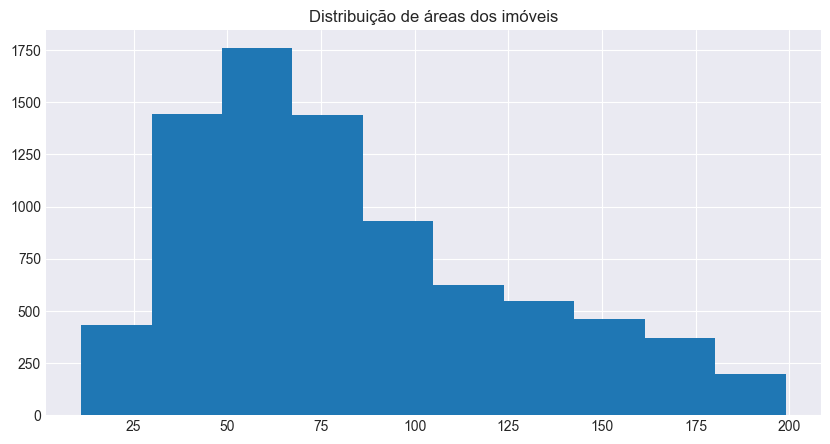

In [7]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
plt.title('Distribuição de áreas dos imóveis')
plt.hist(df['area'], bins=10)
plt.show()

Nas linhas 1, 2 e 3 há as funções básicas do matplotlib para configurar o tamanho, estilo e título, respectivamente, e você já deve tê-las utilizado. Na linha 4, é chamada a função hist() que recebeu como argumento simplesmente a coluna df[‘area’], cuja distribuição deseja se obter. 

Você consegue interpretar o resultado? Cada barra do histograma representa um intervalo de valores. Nesse exemplo, as áreas, de 0 a 25, entre 25 e 50, entre 50 e 75 etc; e o comprimento de cada barra no eixo y representa a quantidade de dados cuja área está dentro daquele intervalo. Por exemplo, nesse conjunto de dados, existem cerca de 400 imóveis com área entre 0 e 25m². Note que, com esse gráfico, é possível ter uma noção imediata sobre a distribuição dos dados. Observa-se que há poucos imóveis com menos de 25 m², uma grande quantidade possui entre 50 e 75 m² e, a partir daí, as quantidades vão caindo e imóveis maiores são mais raros. Você consegue tirar outras conclusões a partir desse gráfico? Tranquilo, então. Vamos prosseguir?!

Talvez você tenha se perguntado o seguinte: “então, quer dizer que o histograma divide os dados em intervalos de valores, que são representados pelas barras... sendo assim, quantos intervalos o histograma deve ter?” Bem, a quantidade ideal de intervalos, chamada em inglês de bins, depende do conjunto de dados e do nível de resolução desejado.

Por isso, perceba que, quando foi utilizada a função hist(), o único argumento passado foram os dados que se desejava visualizar. Nesse caso, a própria função se encarrega de escolher o número de bins. Entretanto, esse valor pode ser configurado, passando a quantidade para o parâmetro bins da função. Confira, no exemplo a seguir, como utilizar 25 bins no histograma:

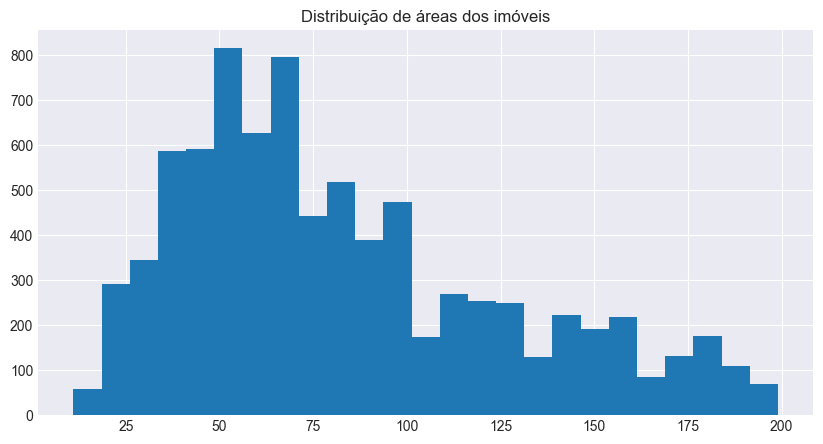

In [9]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de áreas dos imóveis')
plt.hist(df['area'], bins=25)
plt.show()

A única diferença, no código, é que o parâmetro bins da função hist() recebeu o valor 25.

Dessa maneira, o resultado, agora, ficou mais variado do que aquele criado no exemplo anterior. Com isso, note que quanto maior o número de bins maior será a precisão do resultado. Todavia, pode se tornar ruidoso e atrapalhar o entendimento. Por outro lado, com poucos bins, o histograma pode ser muito generalizado. Então, o ideal é tentar encontrar um meio termo que atenda ao objetivo de representar a visualização. Muitas vezes, esse valor é encontrado através de tentativa e erro. Experimente utilizar outras quantidades de bins!

A seguir, confira uma dica importante no box Saiba Mais. Após isso, conheça um pouco mais sobre os histogramas.
Ícone Saiba Mais
Ícone “Saiba Mais”.

Como as outras funções de matplotlib, hist() possui diversos parâmetros que podem ser usados para alterar a visualização. Para a lista completa, consulte sempre a documentação oficial neste link:
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html.

Histogramas são amplamente utilizados para representar distribuições, em parte por serem simples de gerar. Mais recentemente, como o poder computacional tem aumentado, um outro tipo de gráfico tem sido muito utilizado, chamado gráfico de densidade.

No próximo tópico, você conhecerá como funciona o gráfico de densidade, e como criá-los, utilizando a biblioteca seaborn para representar distribuições. 

Como as outras funções de matplotlib, hist() possui diversos parâmetros que podem ser usados para alterar a visualização. Para a lista completa, consulte sempre a documentação oficial neste link:
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html. 

Histogramas são amplamente utilizados para representar distribuições, em parte por serem simples de gerar. Mais recentemente, como o poder computacional tem aumentado, um outro tipo de gráfico tem sido muito utilizado, chamado gráfico de densidade.

No próximo tópico, você conhecerá como funciona o gráfico de densidade, e como criá-los, utilizando a biblioteca seaborn para representar distribuições. 

## Tópico 2 – Gráficos de densidade com seaborn

O gráfico de densidade possui a mesma função do histograma, mas representa a distribuição como uma curva contínua ao invés de bins. A altura da curva no eixo vertical também não é uma contagem de elementos com aquele valor, como no histograma, e sim a estimativa da probabilidade de um elemento possuir aquele valor. Ou seja, é uma interpretação probabilística dos dados. Como são representados por uma curva, gráficos de densidade geram visualizações mais suaves que histogramas e podem facilitar a compreensão da distribuição.

Neste tópico, você deverá aprender a interpretar, criar e modificar gráficos de densidade, utilizando a biblioteca seaborn. Sigamos! 

Criar gráficos de densidade com a biblioteca seaborn é bastante direto, basta utilizar a função distplot(). Essa função é bastante útil, pois funciona de forma dois em um, mostrando, ao mesmo tempo, tanto a curva de probabilidade como os bins do histograma. Confira, no exemplo a seguir, como utilizar essa função para visualizar a distribuição de áreas dos dados imobiliários: 

C:\Users\Fabiano\AppData\Local\Temp\ipykernel_18920\2445075015.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


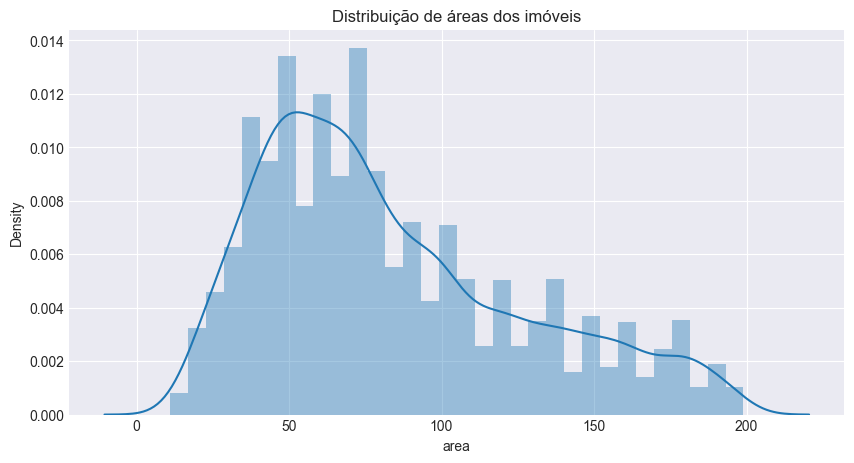

In [10]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de áreas dos imóveis')
sns.distplot(df['area'])
plt.show()

Note que a única diferença, entre este exemplo e os exemplos anteriores, foi a chamada da função distplot() do seaborn, passando como argumento a coluna com as áreas de forma muito similar ao feito com a função hist() do matplotlib. A figura resultante desse código mostra uma curva contínua em azul escura, que corresponde à curva de probabilidade de ocorrência dos dados, e um histograma em azul claro ao fundo. Observe que os valores da curva mostrados no eixo vertical, como foi explicado, não são quantidades, e sim probabilidades, indo de 0 (0% de chance de ocorrência) a 1 (100% de probabilidade de ocorrência). Logo, pela curva de probabilidade, as regiões mais prováveis estão entre 50 e 70 m². Você percebe como o resultado ficou melhor de compreender?

Vamos seguir e conhecer mais sobre o gráfico de densidade, mas, antes disso, confira uma informação importante sobre a curva de probabilidade.

Essa curva de probabilidade é estimada através de um método conhecido como Estimativa de Densidade de Kernel (em inglês, a sigla KDE é utilizada).

A curva de probabilidade é estimada a partir dos dados reais, que são representados pelo histograma. A função distplot() mostra as duas representações em uma mesma imagem. Porém, você pode querer uma figura mais limpa, mostrando apenas a distribuição de forma contínua e suave. Se você quiser apenas o gráfico de densidade, pode-se usar a função kdeplot(). Confira a seguir:

C:\Users\Fabiano\AppData\Local\Temp\ipykernel_18920\4180418950.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['area'], shade=True)


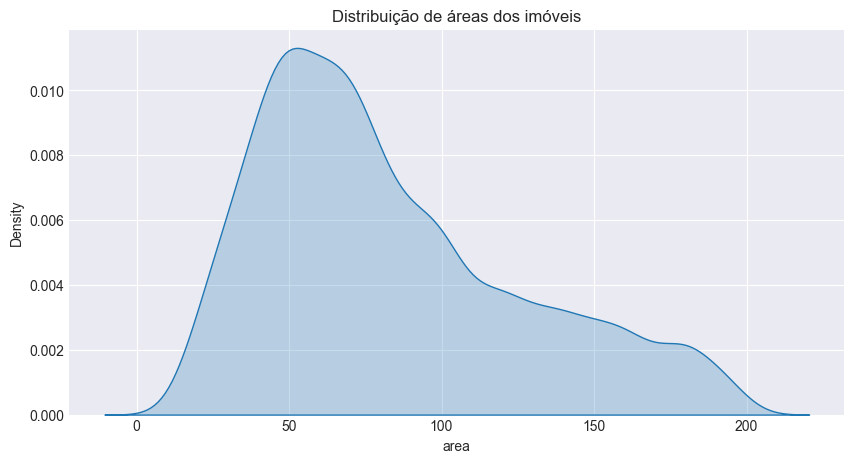

In [11]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de áreas dos imóveis')
sns.kdeplot(df['area'], shade=True)
plt.show()

Na linha 3, é chamada a função kdeplot(), passando como argumentos os dados e o valor True para o parâmetro shade, indicando que a área da curva será preenchida, o que causa um efeito visual que auxilia a percepção. Se não for usado esse parâmetro, só a curva será visível. Para uma lista completa dos parâmetros das funções distplot() e kdeplot(), consulte a documentação oficial disponível nos links: https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot e https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot.

Perceba que uma vantagem do gráfico de densidade é que ele fornece uma visualização da distribuição dos dados, que não depende da quantidade de bins, como é o caso do histograma.


    Matplotlib. https://matplotlib.org/index.html. Acessado pela última vez em Maio de 2020.
    Seaborn. https://seaborn.pydata.org/tutorial.html. Acessado pela última vez em Maio de 2020.
    WILKE, Claus O. Fundamentals of Data Visualization. O’Reilly, 2019.
